<img style="float: center; width: 100%" src="https://raw.githubusercontent.com/andrejkk/TalksImgs/master/FrontSlideUpperBan.png">
<p style="margin-bottom:2cm;"></p>


# Razpoznava socialnega signala hitenje s strojnim učenjem

### Realnočasna analiza gibanja iz podatkov pametnega telefona z razložljivimi modeli strojnega učenja
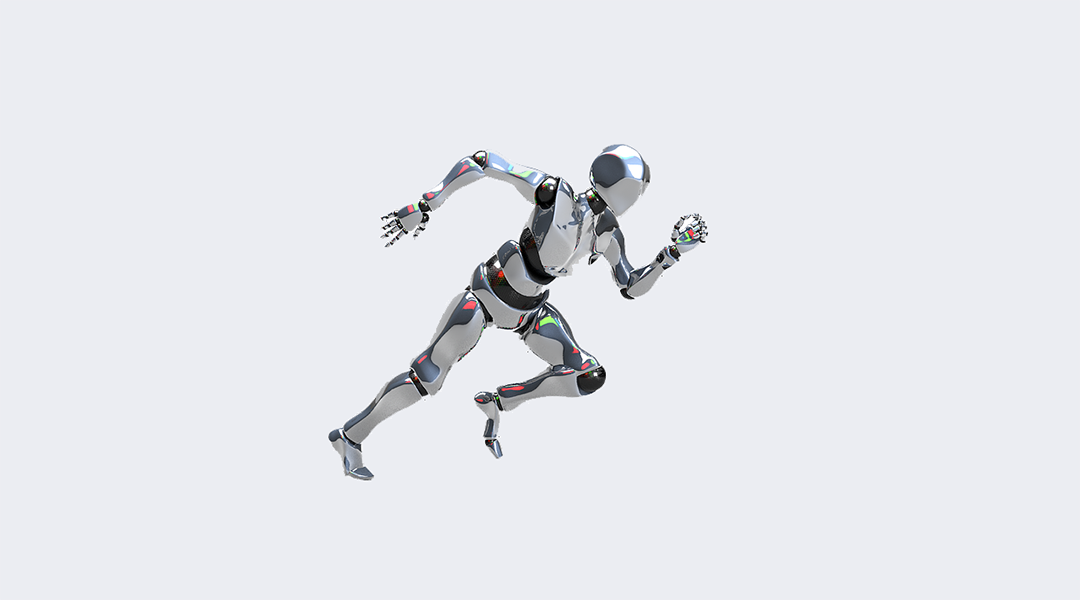

Ime Priimek: Pika Križnar

Predmet: Uporabniku prilagojena komunikacija

Mentor: prof. dr. Andrej Košir

Datum: 3. 1. 2026


<p style="margin-bottom:2cm;"></p>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

Vir slike na naslovnici: https://www.advancedsciencenews.com/robots-powered-by-glucose/

## Kazalo


[Povzetek](#povzetek)

1. [Uvod](#uvod)
    1. [Opredelitev področja](#opredelitev-podrocja)
        1. [Primerjalna analiza z obstoječimi rešitvami](#primerjalna-analiza-z-obstojecimi-resitvami)
    2. [Predstavitev problema](#predstavitev-problema) 
2. [Teoretično ozadje in trenutno stajne](#teoreticno-ozadje)
    1. [Teoretični vidiki problema](#teoretični-vidiki-problema)
    2. [Algoritmi](#algoritmi)
    3. [Merjenje uspešnosti](#merjenje-uspesnosti-resitve)
3. [Eksperimentalni del](#eksperimentalni-del)
    1. [Podatki](#podatki)
    2. [Eksperimentalni del 1 - rezultati modela strojnega učenja](#eksperimentalni-del-1)
    3. [Eksperimentalni del 2 - rezultati sistema v realnem času](#eksperimentalni-del-2)
4. [Zaključek in razprava](#zakljucek-in-razprava)
5. [Doseženi učni izidi](#dosezeni-ucni-izidi)
6. [Literatura in viri](#literatura-in-viri)

<p style="margin-bottom:2cm;"></p>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## Povzetek <a class="anchor" id="povzetek"></a>

V okviru projekta Razpoznava hitenja z modelom strojnega učenja smo razvili celovit prototip sistema, ki na podlagi podatkov akcelerometra zaznava, ali se uporabnik giba umirjeno ali hiti. Projekt presega zgolj tehnično nalogo klasifikacije gibanja in vključuje celoten proces od obdelave surovih senzorskih podatkov, učenja in evalvacije modela strojnega učenja, do zasnove uporabniškega vmesnika in uporabniku prilagojene komunikacije rezultatov. Osrednji cilj projekta je bil prikazati, kako lahko kompleksne modelne napovedi pretvorimo v uporabne in personalizirane informacije za končnega uporabnika.

Sistem temelji na javno dostopnem podatkovnem naboru WISDM, ki vsebuje podatke akcelerometra za različne človeške aktivnosti. Na podlagi teh podatkov smo definirali problem razpoznavanja hitenja kot binarno klasifikacijo med normalno hojo in intenzivnejšim gibanjem. Ker WISDM podatkovni nabor ne vsebuje neposredne oznake “hitenje”, smo razred hitenja konceptualno opredelili na podlagi aktivnosti, ki vključujejo hitrejše in bolj energično gibanje, ter kasneje dodatno uvedli koncept mehke odločitve prek verjetnosti.

V projektu smo posebno pozornost namenili razliki med modelno napovedjo in uporabniško interpretacijo. Model vrača verjetnost hitenja p(rush), ki sama po sebi še ni uporabniku razumljiva. Zato smo uvedli prag odločanja in končno odločitveno spremenljivko q, ki jasno označuje trenutno stanje uporabnika. Na tej osnovi smo razvili metriko Rush Index, ki omogoča analizo uporabnikovega vedenja skozi čas in služi kot temelj za personalizacijo sistema.

Poleg tehničnega dela smo implementirali tudi uporabniški prototip v okolju Streamlit ter mobilno iOS aplikacijo, ki v realnem času zajema podatke akcelerometra in jih pošilja v strežniški del sistema. S tem smo omogočili celoten potek od zajema podatkov do vizualizacije in povratne informacije. Projekt tako predstavlja primer integracije strojnega učenja, obdelave signalov in uporabniku prilagojene komunikacije v eni sami storitvi.

<p style="margin-bottom:2cm;"></p>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## 1. Uvod <a class="anchor" id="uvod"></a>

Razvoj sodobnih interaktivnih sistemov vse pogosteje temelji na analizi senzorskih podatkov, ki omogočajo razumevanje uporabnikovega vedenja v realnem svetu. Mobilni telefoni in nosljive naprave so opremljeni z vrsto senzorjev, med katerimi je akcelerometer eden najpogosteje uporabljenih. Akcelerometer omogoča zaznavanje gibanja uporabnika, kar odpira številne možnosti za analizo aktivnosti, navad in vzorcev vedenja.

V tem projektu smo se osredotočili na zaznavanje hitenja, pri čemer hitenja ne obravnavamo kot psihološkega ali čustvenega stanja, temveč kot fizični vzorec gibanja. Hitenje definiramo kot stanje, v katerem se uporabnik giba hitreje in bolj intenzivno kot pri normalni hoji. Takšna definicija omogoča objektivno merjenje na podlagi podatkov akcelerometra, brez poseganja v subjektivne ali invazivne meritve.

Motivacija za projekt izhaja iz potrebe po sistemih, ki uporabniku nudijo vpogled v lastne navade in mu pomagajo razumeti vzorce vsakodnevnega gibanja. Vendar pa zgolj zaznava aktivnosti ni dovolj. Ključno je, kako sistem rezultate zaznave predstavi uporabniku. Če uporabnik ne razume, kaj sistem zaznava in zakaj, obstaja velika verjetnost, da sistem ne bo sprejet ali uporabljen na dolgi rok.

Zato smo projekt zasnovali kot kombinacijo tehnične rešitve in komunikacijskega sistema. Tehnični del vključuje obdelavo podatkov, učenje modelov strojnega učenja in evalvacijo njihove uspešnosti. Komunikacijski del pa se osredotoča na uporabniku prilagojeno predstavitev rezultatov, uporabo jasnih sporočil ter možnost personalizacije sistema.

Projekt smo razvijali iterativno, pri čemer smo postopoma nadgrajevali funkcionalnosti in razširjali sistem od osnovne klasifikacije do realnočasovne aplikacije. Poseben poudarek smo namenili razložljivosti, saj je razumevanje delovanja sistema ključno za njegovo uporabo v vsakdanjem življenju.


<p style="margin-bottom:2cm;"></p>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

### 1.1. Opredelitev področja <a class="anchor" id="opredelitev-podrocja"></a>

Projekt sodi na področje razpoznavanja človeških aktivnosti (Human Activity Recognition – HAR), ki združuje obdelavo signalov, strojno učenje in interakcijo človek–računalnik. HAR sistemi uporabljajo senzorske podatke za zaznavanje in klasifikacijo različnih oblik človeškega gibanja. Akcelerometer je pri tem eden ključnih senzorjev, saj omogoča merjenje pospeškov v treh oseh in s tem zajame osnovne lastnosti gibanja.

Na področju HAR obstajata dva glavna pristopa: uporaba klasičnih značilnic in uporaba globokih nevronskih mrež, ki delujejo neposredno na surovih signalih. V našem projektu smo se odločili za prvi pristop, saj omogoča večjo razložljivost in lažjo integracijo v realnočasovne sisteme.

Pomemben vidik področja je tudi interpretacija rezultatov. V zadnjih letih se poudarek vse bolj premika od zgolj natančnih modelov k razložljivim in uporabniku prijaznim sistemom. Naš projekt se umešča prav v ta kontekst, saj združuje tehnično zaznavo aktivnosti z uporabniku prilagojeno komunikacijo.

#### 1.1.1 Primerjalna analiza z obstoječimi rešitvami <a class="anchor" id="primerjalna-analiza-z-obstojecimi-resitvami"></a>

##### **Klasični sistemi za razpoznavanje aktivnosti (HAR)**

Eden najbolj citiranih primerov je sistem, predstavljen v okviru podatkovnega nabora WISDM, kjer avtorji uporabljajo podatke akcelerometra za razvrščanje osnovnih aktivnosti, kot so hoja, tek, sedenje in stanje. Takšni sistemi problem obravnavajo kot klasično večrazredno klasifikacijo, pri čemer je cilj doseči čim višjo natančnost pri pravilni oznaki aktivnosti.

V literaturi so pogosto predstavljeni tudi pristopi, ki uporabljajo podporne vektorske stroje, odločitvena drevesa ali nevronske mreže. Ti sistemi praviloma dosegajo zelo visoke vrednosti natančnosti (pogosto nad 95 %), vendar so rezultati večinoma analizirani offline, brez poudarka na realnočasnem delovanju ali uporabniški interpretaciji.

V primerjavi s temi pristopi naš sistem ne cilja na razpoznavanje čim večjega števila aktivnosti, temveč se osredotoča na en specifičen socialni signal – hitenje. S tem problem poenostavimo, vendar hkrati omogočimo globljo interpretacijo vedenja uporabnika.

<figure>
  <img src="wisdm.png" alt="Grafična predstavitev aktivnosti WISDM dataseta" style="max-width:100%; height:auto;">
  <figcaption><b>Slika:</b> Grafična predstavitev aktivnosti WISDM dataseta, vir: https://www.researchgate.net/figure/A-graphical-representation-of-WISDM-dataset-activities_fig2_320043442 </figcaption>
</figure>

##### **Komercialne mobilne aplikacije za sledenje aktivnosti**

Komercialne aplikacije, kot so Google Fit, Apple Health ali Samsung Health, uporabljajo lastniške algoritme za zaznavanje hoje, teka in drugih aktivnosti. Uporabniku so običajno prikazani povzetki, kot so število korakov, trajanje aktivnosti ali porabljene kalorije.

Čeprav so ti sistemi zelo uporabni, imajo dve ključni omejitvi z vidika našega projekta. Prvič, uporabniku ne razkrijejo, kako sistem sprejema odločitve in kakšna je negotovost napovedi. Drugič, intenzivnost gibanja je predstavljena posredno (npr. kot hitrost ali tempo), ne pa kot jasno interpretiran signal, povezan z vedenjem ali rutino uporabnika.

Naš sistem se od teh rešitev razlikuje predvsem v tem, da uporabniku neposredno prikaže verjetnost hitenja in končno odločitev sistema, kar omogoča večjo transparentnost in boljšo podlago za uporabniku prilagojeno povratno informacijo.

<figure>
  <img src="fit.jpg" alt="Google Fit mobilna aplikacija" style="max-width:70%; height:auto;">
  <figcaption><b>Slika:</b> mobilna aplikacija Google Fit, vir: https://blog.en.uptodown.com/now-available-google-fit-sports-activity-one-place/ </figcaption>
</figure>

##### **Raziskovalni sistemi z realnočasno obdelavo**

V raziskovalni literaturi obstajajo tudi sistemi, ki omogočajo realnočasno obdelavo podatkov akcelerometra, pogosto v kontekstu pametnih zdravstvenih ali kontekstno zavednih aplikacij. Takšni sistemi uporabljajo drsna časovna okna in sprotno inferenco, vendar se večinoma osredotočajo na tehnično delovanje sistema in manj na uporabniško izkušnjo.

Naš sistem v primerjavi s temi rešitvami poudarja razložljivost in uporabniško komunikacijo. Namesto zgolj tehničnega izhoda modela (razred ali signal) uporabniku ponujamo večnivojsko interpretacijo: verjetnost, prag odločanja, binarni status in zgodovinski pregled.

**V primerjavi z obstoječimi sistemi lahko ugotovimo, da naš pristop ne izstopa toliko po surovi natančnosti, temveč po načinu uporabe rezultatov strojnega učenja. Medtem ko klasični HAR sistemi in komercialne aplikacije ponujajo predvsem kategorizacijo aktivnosti, naš sistem zaznava in interpretira kontinuiran socialni signal, ki je uporabniku neposredno razumljiv in prilagodljiv njegovim navadam.**


<p style="margin-bottom:2cm;"></p>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

### 1.2. Predstavitev problema <a class="anchor" id="predstavitev-problema"></a>

Osrednji problem projekta je zaznavanje hitenja na podlagi akcelerometra in njegova interpretacija za končnega uporabnika. Problem smo razdelili na več podproblemov: tehnično zaznavo hitenja, pretvorbo modelnih izhodov v uporabniško razumljive informacije ter prilagoditev sistema posamezniku. Tehnični izziv predstavlja obdelava časovnih signalov, ki so šumni in raznoliki med uporabniki. Poleg tega hitenje ni jasno ločena aktivnost, temveč kontinuum gibanja. Zato smo problem obravnavali s pomočjo verjetnostnega modela, ki omogoča mehko odločanje. 

Drug pomemben izziv je komunikacija rezultatov. Uporabniku moramo jasno sporočiti, ali sistem zaznava hitenje ali ne, hkrati pa mu omogočiti vpogled v širši kontekst njegovega vedenja. Ta problem smo naslovili z uvedbo Rush Indexa in razlagalnega sloja v uporabniškem vmesniku.

<p style="margin-bottom:2cm;"></p>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## 2. Teoretično ozadje in trenutno stanje <a class="anchor" id="teoreticno-ozadje-in-trenutno-stanje"></a>

Teoretično ozadje projekta temelji na obdelavi časovnih signalov, strojnem učenju in razložljivosti modelov. Akcelerometer proizvaja časovne vrste, ki jih je treba segmentirati in pretvoriti v značilnice, preden jih lahko uporabimo za učenje modelov.

Uporabili smo klasične statistične značilnice, kot so povprečje, standardni odklon in energija signala, ki učinkovito povzamejo intenzivnost gibanja. Na podlagi teh značilnic smo učili logistično regresijo in naključni gozd. Evalvacija je pokazala, da logistična regresija dosega zelo visoko natančnost, hkrati pa omogoča hitro izvajanje in enostavno interpretacijo.

Pomemben teoretični koncept je ločitev med verjetnostjo p(rush) in končno odločitvijo q. Ta ločitev omogoča personalizacijo sistema brez ponovnega učenja modela, kar je ključno za uporabniku prilagojene sisteme.

<p style="margin-bottom:2cm;"></p>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

### 2.1. Teoretični vidiki problema <a class="anchor" id="teoretični-vidiki-problema"></a>

Problem razpoznavanja hitenja na podlagi podatkov akcelerometra je v osnovi problem analize časovnih signalov in njihove klasifikacije. Akcelerometer generira tridimenzionalni signal pospeškov v osi x, y in z, ki se skozi čas spreminja glede na gibanje uporabnika. Tak signal je tipično poln šuma, nelinearen in močno odvisen od posameznika, položaja naprave ter konteksta uporabe. Zaradi teh lastnosti neposredna uporaba surovih signalov v klasičnih modelih strojnega učenja ni primerna, zato je potrebna ustrezna predobdelava.

<figure>
  <img src="Accelerometer_intro.jpg" alt="Prikaz delovanja akcelerometra" style="max-width:60%; height:auto;">
  <figcaption><b>Slika:</b> Prikaz delovanja akcelerometra, vir: https://www.phidgets.com/docs/Accelerometer_Guide?srsltid=AfmBOoqPG2myeO7OXDpPdDmX7SWEGzvqE6UySMQRfKw5NML0QQ8YkxMm</figcaption>
</figure>

Ključni teoretični korak pri obdelavi takšnih podatkov je segmentiranje časovne vrste v krajša časovna okna. S tem problem pretvorimo iz analize dolgega neprekinjenega signala v analizo zaporedja krajših, približno stacionarnih segmentov. V projektu smo uporabili časovna okna dolžine 5 sekund z delnim prekrivanjem, kar predstavlja kompromis med časovno ločljivostjo in stabilnostjo značilnic. Krajša okna bi povzročila večjo občutljivost na šum, daljša pa bi zmanjšala odzivnost sistema.

Iz vsakega časovnega okna smo izračunali nabor značilnic, ki povzamejo lastnosti gibanja v tem intervalu. Te značilnice vključujejo osnovne statistične mere (povprečje, standardni odklon), energijske mere ter združene magnitude pospeška. Teoretična podlaga tega pristopa temelji na predpostavki, da intenzivnejše gibanje povzroči večjo variabilnost in energijo signala, kar se odraža v izračunanih značilnicah.

Pomemben teoretični vidik problema je tudi razumevanje hitenja kot kontinuuma, ne kot strogo ločene aktivnosti. Med normalno hojo in tekom obstaja širok spekter vmesnih stanj, zato je binarna klasifikacija nujno poenostavitev. To poenostavitev smo naslovili z uporabo verjetnostnega izhoda modela, ki omogoča mehko oceno stopnje hitenja. Verjetnost p(rush) tako ne predstavlja absolutne resnice, temveč stopnjo podobnosti trenutnega gibanja z vzorci, ki jih je model spoznal kot hitenje.

Z vidika uporabniške interpretacije je ključno razlikovati med zaznavo in odločitvijo. Teoretično ločimo modelni izhod (verjetnost) od sistemske odločitve, ki je odvisna od izbranega praga. Ta ločitev omogoča personalizacijo sistema brez spremembe modela, kar je pomembno za prilagodljive storitve. Uporabniki se namreč razlikujejo po hitrosti hoje, telesni pripravljenosti in načinu gibanja, zato enoten prag za vse ne bi bil ustrezen.


<p style="margin-bottom:2cm;"></p>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

### 2.2. Algoritmi <a class="anchor" id="algoritmi"></a>


V projektu smo uporabili dva glavna algoritma strojnega učenja: logistično regresijo (angl. *logistic regression*) in naključni gozd (angl. *Random forest*).

► Logistična regresija je linearni klasifikacijski model, ki ocenjuje verjetnost pripadnosti razredu na podlagi linearne kombinacije vhodnih značilnic. Njena prednost je enostavna interpretacija, saj posamezni koeficienti neposredno kažejo vpliv posamezne značilnice na izhod modela. Poleg tega je logistična regresija računsko nezahtevna in zelo primerna za sisteme, kjer je pomembna hitra obdelava podatkov. V našem projektu se je logistična regresija izkazala kot izjemno učinkovita, saj je dosegla zelo visoke vrednosti natančnosti in ROC AUC.

<figure>
  <img src="logreg.png" alt="Prikaz delovanja algoritma logistične regresije (angl. logistic regression)" style="max-width:40%; height:auto;">
  <figcaption><b>Slika:</b> Prikaz delovanja algoritma logistične regresije (angl. logistic regression), vir: https://www.spiceworks.com/soft-tech/what-is-logistic-regression/</figcaption>
</figure>

► Naključni gozd predstavlja ansambelski algoritem, ki združuje več odločitvenih dreves. Ta pristop omogoča zajemanje nelinearnih odnosov med značilnicami in je pogosto bolj robusten na šum v podatkih. Uporabili smo ga kot primer bolj kompleksnega modela, s katerim smo primerjali rezultate logistične regresije. Čeprav je naključni gozd dosegal primerljive ali celo nekoliko boljše rezultate, smo se za nadaljnjo uporabo odločili za logistično regresijo zaradi njene enostavnosti in preglednosti.

<figure>
  <img src="rf.jpg" alt="Prikaz delovanja algoritma Naključni gozd (angl. Random Forest)" style="max-width:50%; height:auto;">
  <figcaption><b>Slika:</b> Prikaz delovanja algoritma Naključni gozd (angl. Random Forest), vir: https://medium.com/@abhishekjainindore24/everything-about-random-forest-90c106d63989</figcaption>
</figure>

Algoritmi so bili naučeni na predobdelanih podatkih iz WISDM nabora, pri čemer smo uporabili standardno delitev na učno in testno množico. Posebno pozornost smo namenili temu, da med množicama ni prišlo do prekrivanja podatkov iz istega časovnega zaporedja, saj bi to lahko vodilo v precenjeno uspešnost modela. Pomemben del algoritmičnega pristopa je tudi odločanje na podlagi praga. Namesto fiksnega praga 0.5 smo sistem zasnovali tako, da omogoča uporabo personaliziranega praga. S tem algoritemski del postane del širšega sistema, ki se lahko prilagaja uporabniku brez ponovnega učenja modela.


<p style="margin-bottom:2cm;"></p>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

### 2.3. Merjenje uspešnosti rešitve <a class="anchor" id="merjenje-uspesnosti-resitve"></a>

Tehnično evalvacijo sistema smo izvedli z uporabo podatkovnega nabora WISDM, ki je pogosto uporabljen referenčni nabor za raziskave na področju razpoznavanja človeške aktivnosti. Uspešnost modela smo ocenili na testni množici podatkov z uporabo standardnih metrik za binarno klasifikacijo, in sicer accuracy, precision, recall, F1 in ROC AUC.

Kot osnovni model smo uporabili logistično regresijo z vgrajeno standardizacijo vhodnih značilnic. Model je dosegel zelo visoke vrednosti vseh uporabljenih metrik, kar kaže na dobro sposobnost ločevanja med umirjenim in intenzivnim gibanjem. Posebej pomembna je visoka vrednost ROC AUC, ki potrjuje, da model zanesljivo razvršča primere tudi pri različnih pragih odločanja in da ima dobro diskriminativno moč.

Dodatni vpogled v delovanje modela ponuja konfuzijska matrika, ki prikazuje razporeditev pravilnih in napačnih napovedi po posameznih razredih. Iz konfuzijske matrike je razvidno, da je model skoraj brezhibno prepoznal primere normalne hoje, saj ni prišlo do nobene napačne klasifikacije hoje kot hitenja. Pri razredu intenzivnega gibanja je bil zaznan le en primer napačne klasifikacije, kjer je bil tek oziroma hitrejše gibanje napačno označeno kot umirjena hoja. Takšna porazdelitev napak kaže na zelo nizko stopnjo zamenjav med razredoma ter na stabilno in uravnoteženo delovanje modela.

Rezultate smo primerjali z modelom naključnega gozda, ki predstavlja zmogljivejši, a manj razložljiv pristop. Ugotovili smo, da logistična regresija dosega primerljivo natančnost, hkrati pa omogoča hitrejšo inferenco, manjšo kompleksnost in boljšo interpretabilnost izhodov. To je še posebej pomembno v kontekstu realnočasnega sistema, kjer morajo biti odločitve hitre, stabilne in razumljive tudi ne-tehničnim uporabnikom.

Na podlagi teh rezultatov lahko zaključimo, da je izbrani model primeren za nadaljnjo uporabo v realnočasnem sistemu in da predstavlja dobro ravnovesje med natančnostjo, stabilnostjo in razložljivostjo. Konfuzijska matrika dodatno potrjuje, da so napake redke in nesistematične, kar je ključno za zanesljivo zaznavo socialnega signala hitenja v praksi.

<figure>
  <img src="roc_auc_curve.png" alt="ROC AUC Curve modela logistične regresije" style="max-width:100%; height:auto;">
  <figcaption><b>Slika:</b> ROC AUC Curve modela logistične regresije </figcaption>
</figure>

<figure>
  <img src="roc_auc_curve_rf.png" alt="ROC AUC Curve modela naključnega gozda" style="max-width:100%; height:auto;">
  <figcaption><b>Slika:</b> ROC AUC Curve modela naključnega gozda </figcaption>
</figure>

<figure>
  <img src="cm.png" alt="Konfuzijska matrika modela logistične regresije" style="max-width:45%; height:auto;">
  <figcaption><b>Slika:</b> Konfuzijska matrika modela logistične regresije </figcaption>
</figure>

<p style="margin-bottom:2cm;"></p>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## 3. Experimentalni del <a class="anchor" id="eksperimentalni-del"></a>

V eksperimentalnem delu smo predstavili praktično izvedbo projekta, ki vključuje pripravo podatkov, učenje in evalvacijo modela strojnega učenja ter preverjanje delovanja celotnega sistema v realnem času. Eksperimentalni del je razdeljen na tri sklope. Najprej opišemo uporabljene podatke in njihovo predobdelavo, nato predstavimo rezultate učenja modela, v zadnjem sklopu pa rezultate eksperimenta na nivoju celotne storitve, vključno z uporabniško interpretacijo.

Celotna koda je na voljo na GitHub: 

https://github.com/PikaKriznar/upk_rush_recorder

<p style="margin-bottom:2cm;"></p>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

### 3.1 Podatki <a class="anchor" id="Podatki"></a>

Za eksperimentalni del smo uporabili javno dostopen podatkovni nabor WISDM (Wireless Sensor Data Mining), ki vsebuje podatke tridimenzionalnega akcelerometra, zbrane z mobilnimi telefoni med izvajanjem različnih vsakodnevnih aktivnosti. Podatki so shranjeni v obliki časovnih vrst pospeškov v treh oseh in predstavljajo primeren vir za učenje modelov razpoznavanja človeške aktivnosti.

1. Iz celotnega nabora smo izbrali aktivnosti, ki so relevantne za obravnavani problem razpoznavanja hitenja. Kot osnovno stanje smo uporabili normalno hojo, kot intenzivnejše stanje pa aktivnosti, ki vključujejo hitrejše in energičnejše gibanje. Ker podatkovni nabor ne vsebuje eksplicitne oznake “hitenje”, smo razrede definirali na konceptualni ravni in problem formulirali kot binarno klasifikacijo.

2. Podatke smo najprej očistili, odstranili neveljavne ali manjkajoče vrednosti ter jih časovno uredili. Nato smo časovne vrste segmentirali v časovna okna dolžine 5 sekund z 50-odstotnim prekrivanjem, kar omogoča dovolj stabilne značilnice in hkrati zagotavlja odzivnost sistema. Da bi zagotovili kakovost oznak, smo uporabili kriterij purity ≥ 80 %, kar pomeni, da mora vsaj 80 % vzorcev v posameznem oknu pripadati istemu razredu.

3. Iz vsakega časovnega okna smo izračunali nabor značilnic, ki povzamejo lastnosti gibanja. Te vključujejo statistične značilnice (povprečje, standardni odklon, minimum in maksimum) za vsako os ter za magnitudo pospeška, dodatno pa tudi frekvenčne značilnice, izračunane z uporabo hitre Fourierjeve transformacije. Končni podatkovni nabor je vseboval več sto časovnih oken in je bil uravnotežen glede na razrede.

4. Podatke smo razdelili na učno in testno množico z uporabo naključne delitve, pri čemer smo preverili, da sta bila razreda v obeh množicah približno enakomerno zastopana.


<figure>
  <img src="wisdm_pretty.png" alt="Neobdelani podatki WISDM" style="max-width:100%; height:auto;">
  <figcaption><b>Slika:</b> Neobdelani podatki WISDM v 3D prostoru, vir: https://www.researchgate.net/figure/Snapshot-of-the-the-WISDM-Dataset_fig34_311454645 </figcaption>
</figure>

<p style="margin-bottom:2cm;"></p>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

### 3.2 Eksperimentalni del 1 - rezultati modela strojnega učenja <a class="anchor" id="eksperimentalni-del-1"></a>

V prvem eksperimentu smo ovrednotili uspešnost modela strojnega učenja pri razpoznavanju hitenja na podlagi pripravljenih značilnic. Kot osnovni model smo uporabili logistično regresijo, implementirano v obliki pipeline-a, ki vključuje tudi standardizacijo vhodnih značilnic. Ta pristop zagotavlja stabilno delovanje modela in omogoča uporabo enake predobdelave tako pri učenju kot pri realnočasovni inferenci.

Poleg logistične regresije smo za primerjavo uporabili še model naključnega gozda (Random Forest), ki predstavlja nelinearni ansambelski pristop. Namen primerjave ni bil optimizacija zmogljivosti, temveč preverjanje, ali enostavnejši in bolj razložljiv model dosega primerljive rezultate.

Modele smo ocenili z uporabo standardnih metrik za binarno klasifikacijo: accuracy, precision, recall, F1 in ROC AUC. Rezultati so pokazali, da logistična regresija dosega zelo visoko natančnost in uravnoteženo delovanje glede na oba razreda. ROC AUC vrednosti so pokazale, da model zelo dobro ločuje med normalno hojo in hitenjem, kar pomeni, da je primeren za uporabo v sistemu s prilagodljivim pragom odločanja.

Na podlagi teh rezultatov smo kot končni model izbrali logistično regresijo, saj poleg dobre uspešnosti omogoča hitro inferenco, enostavno integracijo v realnočasovni sistem in boljšo razložljivost izhodov. Verjetnostni izhod modela smo uporabili kot osnovo za nadaljnjo interpretacijo in personalizacijo.

<figure>
  <img src="prikaz_app.png" alt="Interaktiven prikaz delovanja modela strojnega učenja" style="max-width:100%; height:auto;">
  <figcaption><b>Slika:</b>Interaktiven prikaz delovanja modela strojnega učenja</figcaption>
</figure>

<p style="margin-bottom:2cm;"></p>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

### 3.3 Eksperimentalni del 2 - rezultati sistema v realnem času <a class="anchor" id="eksperimentalni-del-2"></a>

V drugem eksperimentu smo preverili delovanje celotne storitve v realnem času. Cilj tega eksperimenta ni bil dodatno izboljševanje natančnosti modela, temveč preverjanje, ali sistem kot celota omogoča stabilno, razumljivo in uporabniku prijazno zaznavo hitenja.

Za zajem podatkov smo uporabili mobilni telefon, ki v realnem času bere podatke akcelerometra. Podatki so bili periodično pošiljani strežniškemu delu sistema, kjer smo jih združevali v časovna okna, izračunali značilnice in uporabili naučen model za oceno verjetnosti hitenja. Strežniški del je bil implementiran z uporabo ogrodja FastAPI in ASGI strežnika Uvicorn. Rezultati inferenc so bili posredovani uporabniškemu vmesniku, implementiranemu v okolju Streamlit. Uporabniški vmesnik prikazuje trenutni status (CALM ali RUSH), verjetnost hitenja ter zgodovino zaznanih oken. Posebno pozornost smo namenili vizualni in besedni interpretaciji rezultatov, saj je cilj sistema, da uporabniku jasno in neposredno sporoči zaznano stanje.

Eksperiment je pokazal, da sistem stabilno zaznava spremembe v intenzivnosti gibanja. Pri umirjeni hoji je bila verjetnost hitenja nizka, ob hitrejši hoji ali teku pa se je opazno povečala. Uporabniški vmesnik je omogočil jasno razlikovanje med stanji in sproten vpogled v trend gibanja. Na podlagi tega eksperimenta lahko zaključimo, da sistem uspešno povezuje strojno učenje, realnočasno obdelavo podatkov in uporabniku prilagojeno komunikacijo. Rezultati potrjujejo, da je zasnova primerna za nadaljnje nadgradnje, kot so personalizirani pragovi, dolgoročna analiza vedenja in naprednejša povratna informacija za uporabnika.


<figure>
  <div style="display:flex; gap:20px; justify-content:center; align-items:flex-start;">
    <div style="text-align:center;">
      <img src="running.png"
           alt="Posnetek zaslona med snemanjem uporabniškega gibanja na mobilni aplikaciji"
           style="max-width:100%; height:auto;">
      <figcaption>
        <b>Slika:</b> Posnetek zaslona med snemanjem uporabniškega gibanja na mobilni aplikaciji
      </figcaption>
    </div>
    <div style="text-align:center;">
      <img src="sent.png"
           alt="Stanje poslani podatki na strežnik"
           style="max-width:100%; height:auto;">
      <figcaption>
        <b>Slika:</b> Stanje poslani podatki na strežnik
      </figcaption>
    </div>
    <div style="text-align:center;">
      <img src="rush_index_live_demo_ios.png"
           alt="Stanje ustavljeno"
           style="max-width:100%; height:auto;">
      <figcaption>
        <b>Slika:</b> Stanje ustavljeno
      </figcaption>
    </div>
  </div>
</figure>


<figure>
  <img src="prikaz_live_app.png" alt="Prikaz aplikacije preko Streamlite v realnem času" style="max-width:100%; height:auto;">
  <figcaption><b>Slika:</b> Prikaz podatkov v realnem času na spletni aplikaciji preko Streamlite </figcaption>
</figure>



<p style="margin-bottom:2cm;"></p>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## 4. Zaključek in razprava <a class="anchor" id="zakljucek-in-razprava"></a>

V okviru projekta Razpoznava hitenja z modelom strojnega učenja smo uspešno razvili celovit sistem, ki združuje obdelavo senzorskih podatkov, strojno učenje, realnočasovno obdelavo ter uporabniku prijazno predstavitev rezultatov. Projekt je pokazal, da je razpoznavanje hitenja na podlagi podatkov akcelerometra tehnično izvedljivo in da lahko z relativno preprostimi modeli dosežemo zelo visoko stopnjo natančnosti.

Z vidika tehnične izvedbe se je logistična regresija izkazala kot zelo primerna izbira. Kljub svoji enostavnosti je dosegla izjemno dobre rezultate pri ločevanju med normalno hojo in intenzivnejšim gibanjem. To potrjuje ugotovitve iz literature, da so za številne probleme razpoznavanja aktivnosti dobro izbrane značilnice pogosto pomembnejše od kompleksnosti modela. Poleg tega logistična regresija omogoča hiter izračun napovedi, kar je ključno za realnočasovne sisteme, kot je naš.

Pomemben vidik razprave predstavlja tudi uporaba verjetnostnega izhoda modela. Namesto da bi sistem uporabniku neposredno prikazoval surovo verjetnost, smo uvedli jasno ločitev med verjetnostjo p(rush) in končno odločitvijo q. Ta zasnova se je izkazala kot ključna za nadaljnjo personalizacijo sistema. S spreminjanjem praga odločanja lahko sistem prilagodimo posameznemu uporabniku, ne da bi bilo treba ponovno učiti model. To bistveno poenostavi uporabo sistema v praksi in omogoča njegovo razširitev na večje število uporabnikov.

Projekt ima seveda tudi določene omejitve. Ena izmed glavnih omejitev je uporaba podatkovnega nabora WISDM, ki je bil zbran v specifičnih pogojih in z omejenim naborom aktivnosti. Čeprav smo omogočili realno zajemanje podatkov z mobilnega telefona, sistem še ni bil testiran na večjem številu uporabnikov v daljšem časovnem obdobju. Prav tako nismo izvajali poglobljenih uporabniških študij, ki bi omogočile kvantitativno oceno vpliva sistema na vedenje uporabnikov.

Druga omejitev je povezana z definicijo hitenja. Hitenje smo definirali izključno na podlagi intenzivnosti gibanja, kar pomeni, da sistem ne zaznava psihološkega ali čustvenega stresa. To je pomembno jasno poudariti, saj bi lahko uporabniki napačno interpretirali rezultate. V prihodnjih nadgradnjah bi bilo smiselno razmisliti o vključitvi dodatnih senzorjev ali kontekstualnih podatkov, ki bi omogočili bogatejšo interpretacijo uporabnikovega stanja.

Kljub tem omejitvam projekt predstavlja trdno osnovo za nadaljnji razvoj. Možne nadgradnje vključujejo daljše obdobje personalizacije, uporabo naprednejših modelov, integracijo z drugimi napravami ter izvedbo obsežnejših uporabniških študij. Projekt jasno kaže potencial povezovanja strojnega učenja z uporabniku prilagojenimi storitvami in poudarja pomen razložljivosti in komunikacije rezultatov v sodobnih interaktivnih sistemih.


<p style="margin-bottom:2cm;"></p>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## 5. Doseženi učni izidi <a class="anchor" id="dosezeni-ucni-izidi"></a>

V okviru projekta smo dosegli številne učne izide, ki zajemajo tehnične, metodološke in konceptualne vidike razvoja sodobnih interaktivnih sistemov. Projekt je omogočil poglobljeno razumevanje celotnega procesa razvoja storitve, ki temelji na strojnem učenju, od začetne analize problema do izdelave delujočega prototipa.

Na tehnični ravni smo pridobili poglobljeno znanje o obdelavi senzorskih podatkov, zlasti časovnih signalov akcelerometra. Naučili smo se, kako pomembna je pravilna predobdelava podatkov, vključno s segmentiranjem, izbiro dolžine časovnih oken in izračunom ustreznih značilnic. Razumeli smo, da kakovost vhodnih značilnic pogosto odločilno vpliva na uspešnost modela, včasih celo bolj kot izbira samega algoritma.

Poleg tega smo utrdili znanje s področja strojnega učenja, zlasti na področju binarne klasifikacije. Spoznali smo prednosti in omejitve različnih algoritmov ter se naučili, kako pravilno ovrednotiti modele z uporabo ustreznih metrik. Poseben poudarek smo namenili razumevanju ROC krivulj in vpliva praga odločanja na delovanje sistema, kar je neposredno povezano s personalizacijo.

Pomemben učni izid projekta je tudi razumevanje razlike med modelno napovedjo in sistemsko odločitvijo. Ta koncept je ključen za razvoj uporabniku prilagojenih sistemov, saj omogoča ločevanje med učenjem modela in prilagajanjem obnašanja sistema posamezniku. S tem smo pridobili pomembno metodološko znanje, ki je uporabno tudi v drugih kontekstih strojnega učenja.

Na področju razvoja prototipov smo pridobili praktične izkušnje z integracijo različnih tehnologij. Uporaba Pythona, FastAPI, Uvicorn in Streamlit nam je omogočila hitro izdelavo delujočega sistema, ki podpira realnočasovno obdelavo podatkov in interaktivno vizualizacijo. Poleg tega smo razvili iOS aplikacijo, ki uporablja sistemske API-je za zajem senzorskih podatkov in komunikacijo s strežnikom. Ta del projekta je zahteval razumevanje omrežnih protokolov, dovoljenj in omejitev mobilnih platform.

Skupno gledano projekt predstavlja pomembno učno izkušnjo, saj združuje teorijo in prakso ter poudarja pomen interdisciplinarnega pristopa. Pridobljena znanja in izkušnje so neposredno prenosljive na druge projekte in predstavljajo trdno osnovo za nadaljnje delo na področju strojnega učenja, obdelave signalov in uporabniku prilagojenih interaktivnih sistemov.


<p style="margin-bottom:2cm;"></p>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## 6. Literatura in viri  <a class="anchor" id="literatura-in-viri"></a>

1. Kwapisz, J. R., Weiss, G. M., & Moore, S. A. (2011).  
   *Activity recognition using cell phone accelerometers.*  
   ACM SIGKDD Explorations Newsletter, 12(2), 74–82.  
   https://doi.org/10.1145/1964897.1964918  
   (Dostopano: 12. 12. 2025)

2. Bao, L., & Intille, S. S. (2004).  
   *Activity recognition from user-annotated acceleration data.*  
   In Pervasive Computing (pp. 1–17). Springer.  
   https://doi.org/10.1007/978-3-540-24646-6_1  
   (Dostopano: 19. 12. 2025)

3. Zhang, M., & Sawchuk, A. A. (2012).  
   *A feature selection-based framework for human activity recognition using wearable multimodal sensors.*  
   Proceedings of the ACM International Conference on Ubiquitous Computing, 92–101.  
   https://doi.org/10.1145/2370216.2370238  
   (Dostopano: 20. 12. 2025)

4. Guyon, I., & Elisseeff, A. (2003).  
   *An introduction to variable and feature selection.*  
   Journal of Machine Learning Research, 3, 1157–1182.  
   (Dostopano: 20. 12. 2025)

5. Bishop, C. M. (2006).  
   *Pattern Recognition and Machine Learning.*  
   Springer.  
   (Dostopano: 21. 12. 2025)

6. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021).  
   *An Introduction to Statistical Learning* (2nd ed.).  
   Springer.  
   https://www.statlearning.com/  
   (Dostopano: 2. 1. 2026)

7. Breiman, L. (2001).  
   *Random forests.*  
   Machine Learning, 45, 5–32.  
   https://doi.org/10.1023/A:1010933404324  
   (Dostopano: 2. 1. 2026)

8. Powers, D. M. W. (2011).  
   *Evaluation: From precision, recall and F-measure to ROC, informedness, markedness and correlation.*  
   Journal of Machine Learning Technologies, 2(1).  
   (Dostopano: 20. 12. 2026)

9. Jameson, A. (2003).  
   *Adaptive interfaces and agents.*  
   In The Human-Computer Interaction Handbook.  
   https://doi.org/10.1201/9781410607775.ch24  
   (Dostopano: 20. 12. 2025)

10. Kobsa, A. (2007).  
    *Generic user modeling systems.*  
    In The Adaptive Web. Springer.  
    https://doi.org/10.1007/978-3-540-72079-9_2  
    (Dostopano: 20. 12. 2025)

11. Brusilovsky, P., & Millán, E. (2007).  
    *User models for adaptive hypermedia and adaptive educational systems.*  
    In The Adaptive Web. Springer.  
    (Dostopano: 20. 12. 2025)

---

## Dodatni tehnični viri

1. Uvicorn Contributors. (2024).  
   *Uvicorn: An ASGI web server implementation for Python.*  
   https://uvicorn.dev/  
   (Dostopano: 13. 12. 2025)

2. Streamlit Inc. (2024).  
   *Streamlit Documentation.*  
   https://docs.streamlit.io/  
   (Dostopano: 13. 12. 2025)

3. Python Software Foundation. (2024).  
   *Python 3 Documentation.*  
   https://docs.python.org/3/  
   (Dostopano: 13. 12. 2025)
